In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [4]:
df_min=df[df['8']==1]

In [5]:
df_min.to_csv('pima_minority_train.csv',index=False)
df_min=pd.read_csv('pima_minority_train.csv')

In [6]:
df_majority=df[df['8']==0]
df_majority.to_csv('pima_majority_train.csv',index=False)
df_majority=pd.read_csv('pima_majority_train.csv')

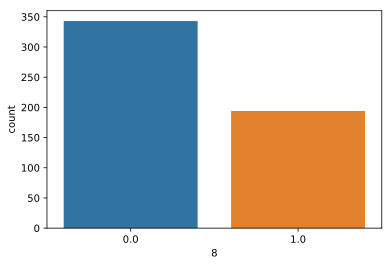

In [7]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,3)#5
print(x.shape)
print(y.shape)

(190, 3, 9)
(190, 9)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
114/114 [==============================] - 20s 179ms/step - loss: 0.2745
Epoch 2/500
114/114 [==============================] - 0s 616us/step - loss: 0.2476
Epoch 3/500
114/114 [==============================] - 0s 484us/step - loss: 0.2217
Epoch 4/500
114/114 [==============================] - 0s 545us/step - loss: 0.1981
Epoch 5/500
114/114 [==============================] - 0s 528us/step - loss: 0.1763
Epoch 6/500
114/114 [==============================] - 0s 484us/step - loss: 0.1565
Epoch 7/500
114/114 [==============================] - 0s 522us/step - loss: 0.1382
Epoch 8/500
114/114 [==============================] - 0s 554us/step - loss: 0.1218
Epoch 9/500
114/114 [==============================] - 0s 514us/step - loss: 0.1066
Epoch 10/500
114/114 [==============================] - 0s 576us/step - loss: 0.0933
Epoch 11/500
114/114 [==============================] - 0s 493us/step - loss: 0.0815
Epoch 12/500
114/114 [==============================] - 0s 450us/step - l

114/114 [==============================] - 0s 413us/step - loss: 0.0286
Epoch 98/500
114/114 [==============================] - 0s 504us/step - loss: 0.0286
Epoch 99/500
114/114 [==============================] - 0s 405us/step - loss: 0.0286
Epoch 100/500
114/114 [==============================] - 0s 431us/step - loss: 0.0286
Epoch 101/500
114/114 [==============================] - 0s 418us/step - loss: 0.0285
Epoch 102/500
114/114 [==============================] - 0s 431us/step - loss: 0.0286
Epoch 103/500
114/114 [==============================] - 0s 449us/step - loss: 0.0285
Epoch 104/500
114/114 [==============================] - 0s 400us/step - loss: 0.0285
Epoch 105/500
114/114 [==============================] - 0s 405us/step - loss: 0.0285
Epoch 106/500
114/114 [==============================] - 0s 431us/step - loss: 0.0285
Epoch 107/500
114/114 [==============================] - 0s 457us/step - loss: 0.0285
Epoch 108/500
114/114 [==============================] - 0s 413us/step

114/114 [==============================] - 0s 585us/step - loss: 0.0274
Epoch 193/500
114/114 [==============================] - 0s 598us/step - loss: 0.0274
Epoch 194/500
114/114 [==============================] - 0s 585us/step - loss: 0.0273
Epoch 195/500
114/114 [==============================] - 0s 941us/step - loss: 0.0273
Epoch 196/500
114/114 [==============================] - 0s 730us/step - loss: 0.0273
Epoch 197/500
114/114 [==============================] - 0s 770us/step - loss: 0.0273
Epoch 198/500
114/114 [==============================] - 0s 598us/step - loss: 0.0273
Epoch 199/500
114/114 [==============================] - 0s 440us/step - loss: 0.0273
Epoch 200/500
114/114 [==============================] - 0s 396us/step - loss: 0.0273
Epoch 201/500
114/114 [==============================] - 0s 413us/step - loss: 0.0273
Epoch 202/500
114/114 [==============================] - 0s 440us/step - loss: 0.0273
Epoch 203/500
114/114 [==============================] - 0s 536us/st

114/114 [==============================] - 0s 704us/step - loss: 0.0264
Epoch 288/500
114/114 [==============================] - 0s 466us/step - loss: 0.0264
Epoch 289/500
114/114 [==============================] - 0s 616us/step - loss: 0.0264
Epoch 290/500
114/114 [==============================] - 0s 484us/step - loss: 0.0264
Epoch 291/500
114/114 [==============================] - 0s 633us/step - loss: 0.0264
Epoch 292/500
114/114 [==============================] - 0s 624us/step - loss: 0.0264
Epoch 293/500
114/114 [==============================] - 0s 686us/step - loss: 0.0263
Epoch 294/500
114/114 [==============================] - 0s 642us/step - loss: 0.0264
Epoch 295/500
114/114 [==============================] - 0s 589us/step - loss: 0.0263
Epoch 296/500
114/114 [==============================] - 0s 598us/step - loss: 0.0263
Epoch 297/500
114/114 [==============================] - 0s 554us/step - loss: 0.0263
Epoch 298/500
114/114 [==============================] - 0s 668us/st

114/114 [==============================] - 0s 422us/step - loss: 0.0256
Epoch 383/500
114/114 [==============================] - 0s 422us/step - loss: 0.0256
Epoch 384/500
114/114 [==============================] - 0s 475us/step - loss: 0.0256
Epoch 385/500
114/114 [==============================] - 0s 431us/step - loss: 0.0256
Epoch 386/500
114/114 [==============================] - 0s 413us/step - loss: 0.0256
Epoch 387/500
114/114 [==============================] - 0s 449us/step - loss: 0.0256
Epoch 388/500
114/114 [==============================] - 0s 405us/step - loss: 0.0256
Epoch 389/500
114/114 [==============================] - 0s 475us/step - loss: 0.0256
Epoch 390/500
114/114 [==============================] - 0s 449us/step - loss: 0.0256
Epoch 391/500
114/114 [==============================] - 0s 422us/step - loss: 0.0256
Epoch 392/500
114/114 [==============================] - 0s 413us/step - loss: 0.0256
Epoch 393/500
114/114 [==============================] - 0s 436us/st

114/114 [==============================] - 0s 506us/step - loss: 0.0249
Epoch 478/500
114/114 [==============================] - 0s 479us/step - loss: 0.0249
Epoch 479/500
114/114 [==============================] - 0s 462us/step - loss: 0.0250
Epoch 480/500
114/114 [==============================] - 0s 413us/step - loss: 0.0249
Epoch 481/500
114/114 [==============================] - 0s 444us/step - loss: 0.0249
Epoch 482/500
114/114 [==============================] - 0s 418us/step - loss: 0.0249
Epoch 483/500
114/114 [==============================] - 0s 453us/step - loss: 0.0249
Epoch 484/500
114/114 [==============================] - 0s 501us/step - loss: 0.0249
Epoch 485/500
114/114 [==============================] - 0s 440us/step - loss: 0.0249
Epoch 486/500
114/114 [==============================] - 0s 431us/step - loss: 0.0249
Epoch 487/500
114/114 [==============================] - 0s 440us/step - loss: 0.0249
Epoch 488/500
114/114 [==============================] - 0s 449us/st

In [14]:
model.save('7-24-2019-pima.h5')

In [15]:
Xtrain.shape

(114, 3, 9)

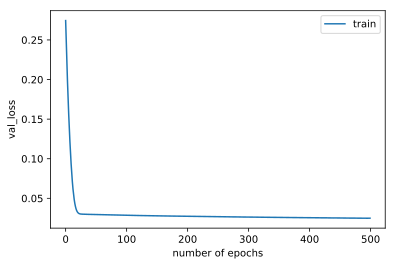

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

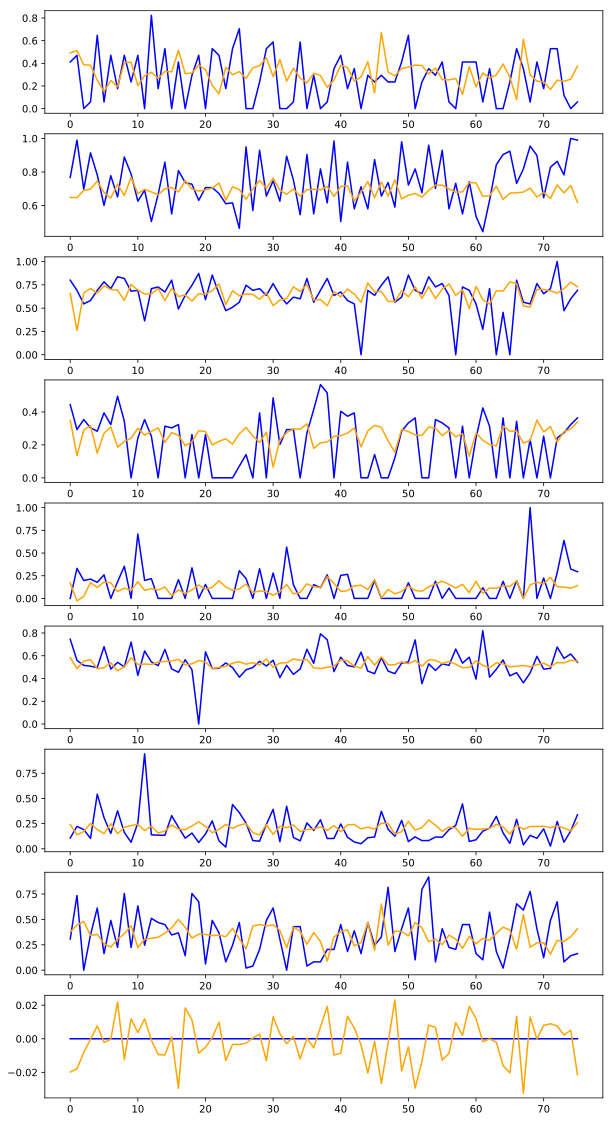

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 4.91253227e-01,  6.48728907e-01,  6.57504916e-01,
         3.49247158e-01,  1.69389233e-01,  5.84096074e-01,
         2.40457639e-01,  3.74922425e-01, -1.98080391e-02],
       [ 5.12965381e-01,  6.47467852e-01,  2.60958910e-01,
         1.34569868e-01, -2.76560299e-02,  4.87159878e-01,
         1.38162643e-01,  4.44977254e-01, -1.79111511e-02],
       [ 3.87108594e-01,  6.90306664e-01,  6.63192451e-01,
         2.90103972e-01,  2.10349150e-02,  5.52582085e-01,
         1.70422062e-01,  4.78492707e-01, -8.04568827e-03],
       [ 3.83204430e-01,  6.98416173e-01,  7.10964322e-01,
         3.16544771e-01,  1.74868032e-01,  5.65811634e-01,
         2.53178775e-01,  3.42823952e-01, -3.61628830e-04],
       [ 2.51544178e-01,  7.45644510e-01,  6.60971165e-01,
         1.49201855e-01,  1.21238485e-01,  4.85106409e-01,
         1.91141635e-01,  3.53109419e-01,  7.70351291e-03],
       [ 1.51066110e-01,  6.77694619e-01,  7.39750564e-01,
         2.70813137e-01,  1.81704521e-01,  4.956021

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

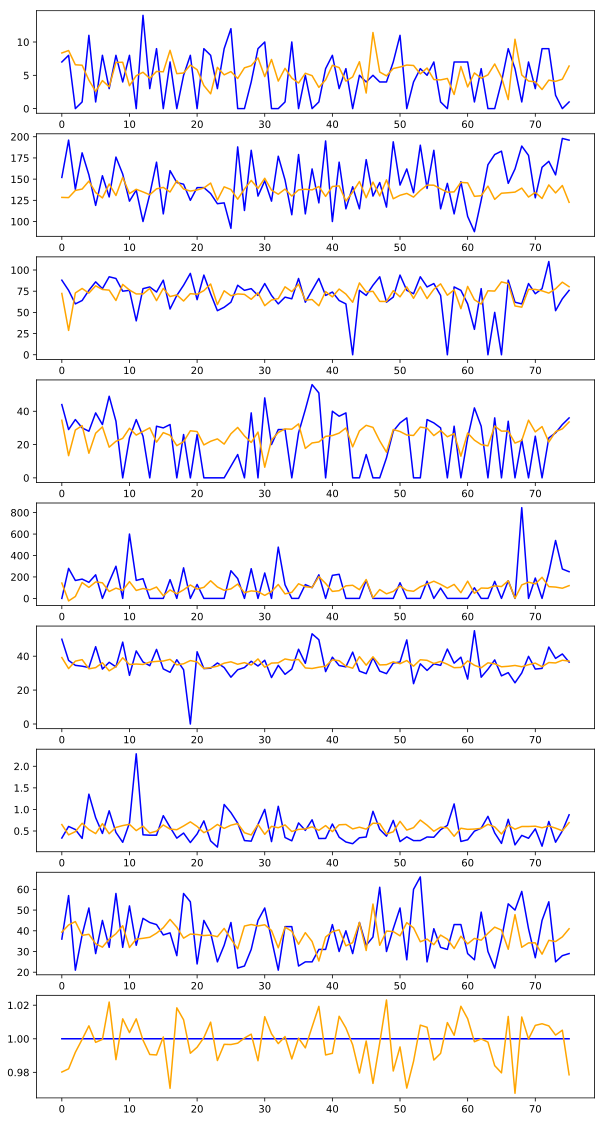

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 4.91253227e-01,  6.48728907e-01,  6.57504916e-01,
         3.49247158e-01,  1.69389233e-01,  5.84096074e-01,
         2.40457639e-01,  3.74922425e-01, -1.98080391e-02],
       [ 5.12965381e-01,  6.47467852e-01,  2.60958910e-01,
         1.34569868e-01, -2.76560299e-02,  4.87159878e-01,
         1.38162643e-01,  4.44977254e-01, -1.79111511e-02],
       [ 3.87108594e-01,  6.90306664e-01,  6.63192451e-01,
         2.90103972e-01,  2.10349150e-02,  5.52582085e-01,
         1.70422062e-01,  4.78492707e-01, -8.04568827e-03],
       [ 3.83204430e-01,  6.98416173e-01,  7.10964322e-01,
         3.16544771e-01,  1.74868032e-01,  5.65811634e-01,
         2.53178775e-01,  3.42823952e-01, -3.61628830e-04],
       [ 2.51544178e-01,  7.45644510e-01,  6.60971165e-01,
         1.49201855e-01,  1.21238485e-01,  4.85106409e-01,
         1.91141635e-01,  3.53109419e-01,  7.70351291e-03],
       [ 1.51066110e-01,  6.77694619e-01,  7.39750564e-01,
         2.70813137e-01,  1.81704521e-01,  4.956021

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)